In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

X


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


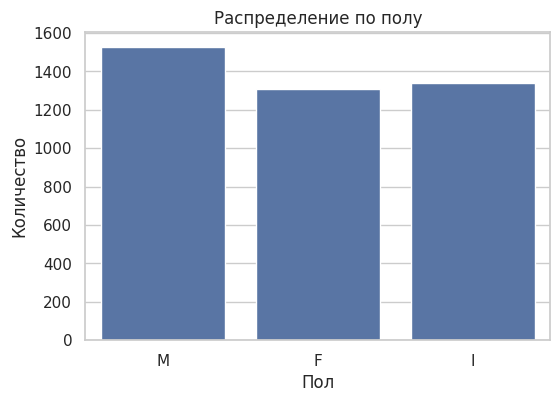

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=X.iloc[:, 0])
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

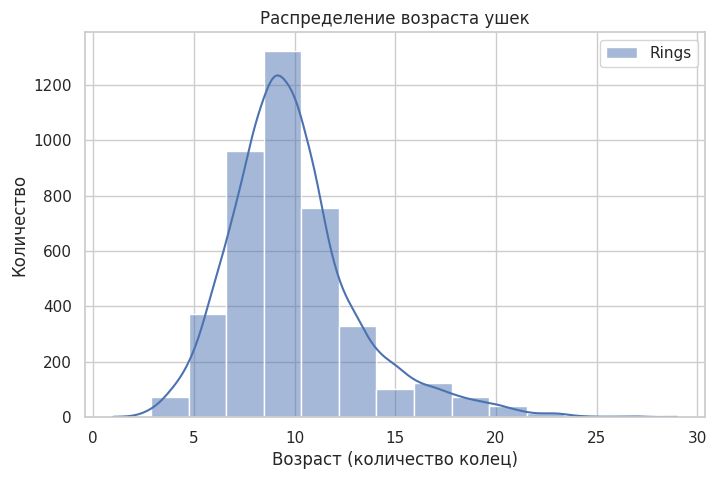

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=15, kde=True)
plt.title('Распределение возраста ушек')
plt.xlabel('Возраст (количество колец)')
plt.ylabel('Количество')
plt.show()

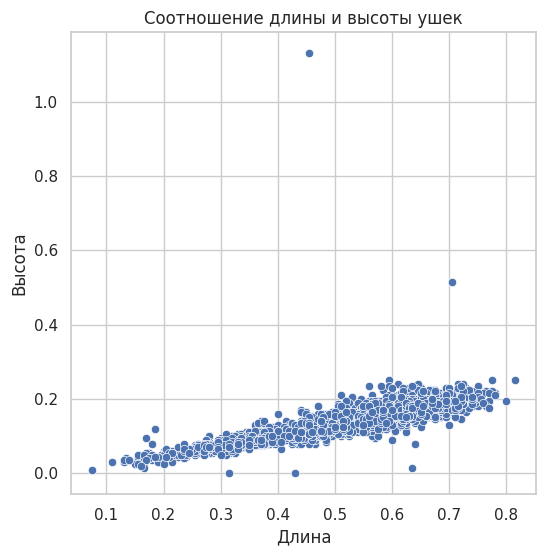

In [4]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 3])
plt.title('Соотношение длины и высоты ушек')
plt.xlabel('Длина')
plt.ylabel('Высота')
plt.show()

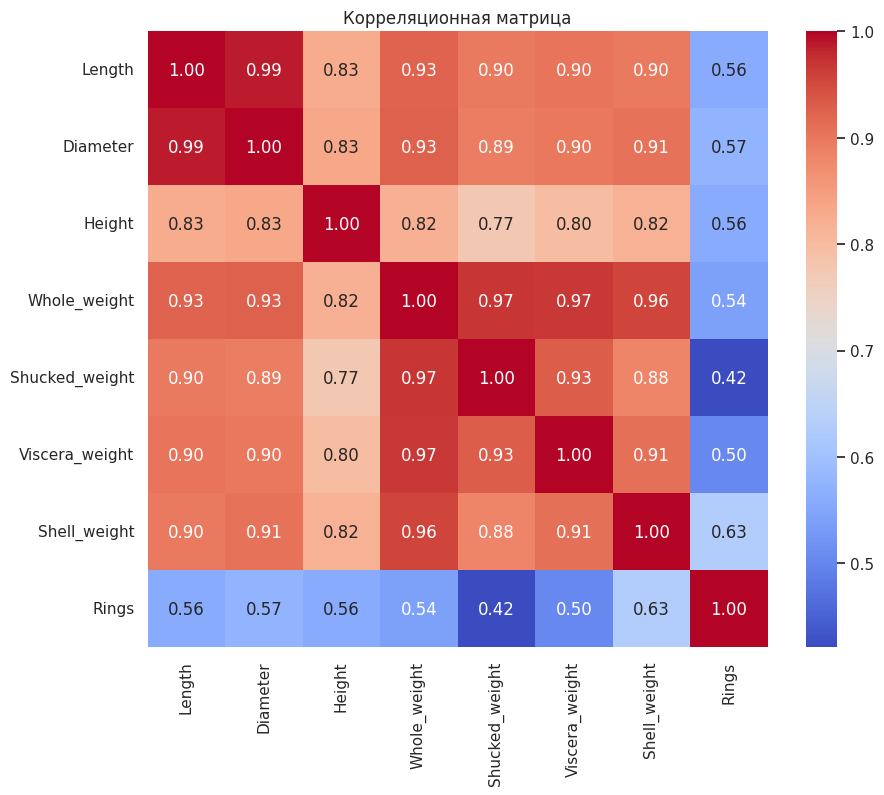

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Объединение признаков и целевой переменной
data = pd.concat([X, y], axis=1)

# Предполагая, что первый столбец - это категориальная переменная 'Пол', мы исключаем её
numeric_data = data.select_dtypes(include=[float, int])

# Вычисление корреляционной матрицы для числовых данных
corr_matrix = numeric_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()


In [6]:



data['size'] = data[['Length', 'Diameter', 'Height']].mean(axis=1)

data.drop(['Length', 'Diameter', 'Height'], axis=1, inplace=True)

data


,Sex,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,size
0,M,0.5140,0.2245,0.1010,0.1500,15,0.305000
1,M,0.2255,0.0995,0.0485,0.0700,7,0.235000
2,F,0.6770,0.2565,0.1415,0.2100,9,0.361667
3,M,0.5160,0.2155,0.1140,0.1550,10,0.310000
4,I,0.2050,0.0895,0.0395,0.0550,7,0.221667
...,...,...,...,...,...,...,...
4172,F,0.8870,0.3700,0.2390,0.2490,11,0.393333
4173,M,0.9660,0.4390,0.2145,0.2605,10,0.388333
4174,M,1.1760,0.5255,0.2875,0.3080,9,0.426667
4175,F,1.0945,0.5310,0.2610,0.2960,10,0.420000


In [7]:
import pandas as pd


data['Weight_index'] = data[['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']].mean(axis=1)


data.drop(['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'], axis=1, inplace=True)

data.head()


,Sex,Rings,size,Weight_index
0,M,15,0.305000,0.247375
1,M,7,0.235000,0.110875
2,F,9,0.361667,0.321250
3,M,10,0.310000,0.250125
4,I,7,0.221667,0.097250


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


X = data[['size', 'Weight_index']]
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print("rsquared: "+str(r_squared)+" ,RMSE: "+str(rmse))


rsquared: 0.22832530410949636 ,RMSE: 2.890249240092705


In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(X_test)


rmse = sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Лучшие параметры: {best_params}")
print(f"Test RMSE: {rmse}")
print(f"Test R-squared: {r_squared}")


Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 29}
Test RMSE: 2.702484747771018
Test R-squared: 0.3253319075381681


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = pd.concat([X, y], axis=1)


sex_column = abalone.data.features.iloc[:, 0]
X_classification = data[['size', 'Weight_index']]
y_classification = sex_column


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_classification)


X_train, X_test, y_train, y_test = train_test_split(X_classification, y_encoded, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5059808612440191
              precision    recall  f1-score   support

           F       0.41      0.43      0.42       262
           I       0.62      0.72      0.67       267
           M       0.48      0.39      0.43       307

    accuracy                           0.51       836
   macro avg       0.50      0.51      0.50       836
weighted avg       0.50      0.51      0.50       836

[[113  49 100]
 [ 45 191  31]
 [121  67 119]]
